# Regression

## Boston housing price prediction
### Birsaneanu Andreea Ruxandra

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [2]:
print(sklearn.__version__)


0.24.2


In [3]:
df=pd.read_csv('boston_data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243,16.8,393.97,9.43,20.5


In [4]:
col_name=['crim','zn','indus','chad','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']


In [5]:
df.columns=col_name
df.head()

,crim,zn,indus,chad,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243,16.8,393.97,9.43,20.5


## Exploratary Data Analysis

In [6]:
df.describe()

,crim,zn,indus,chad,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


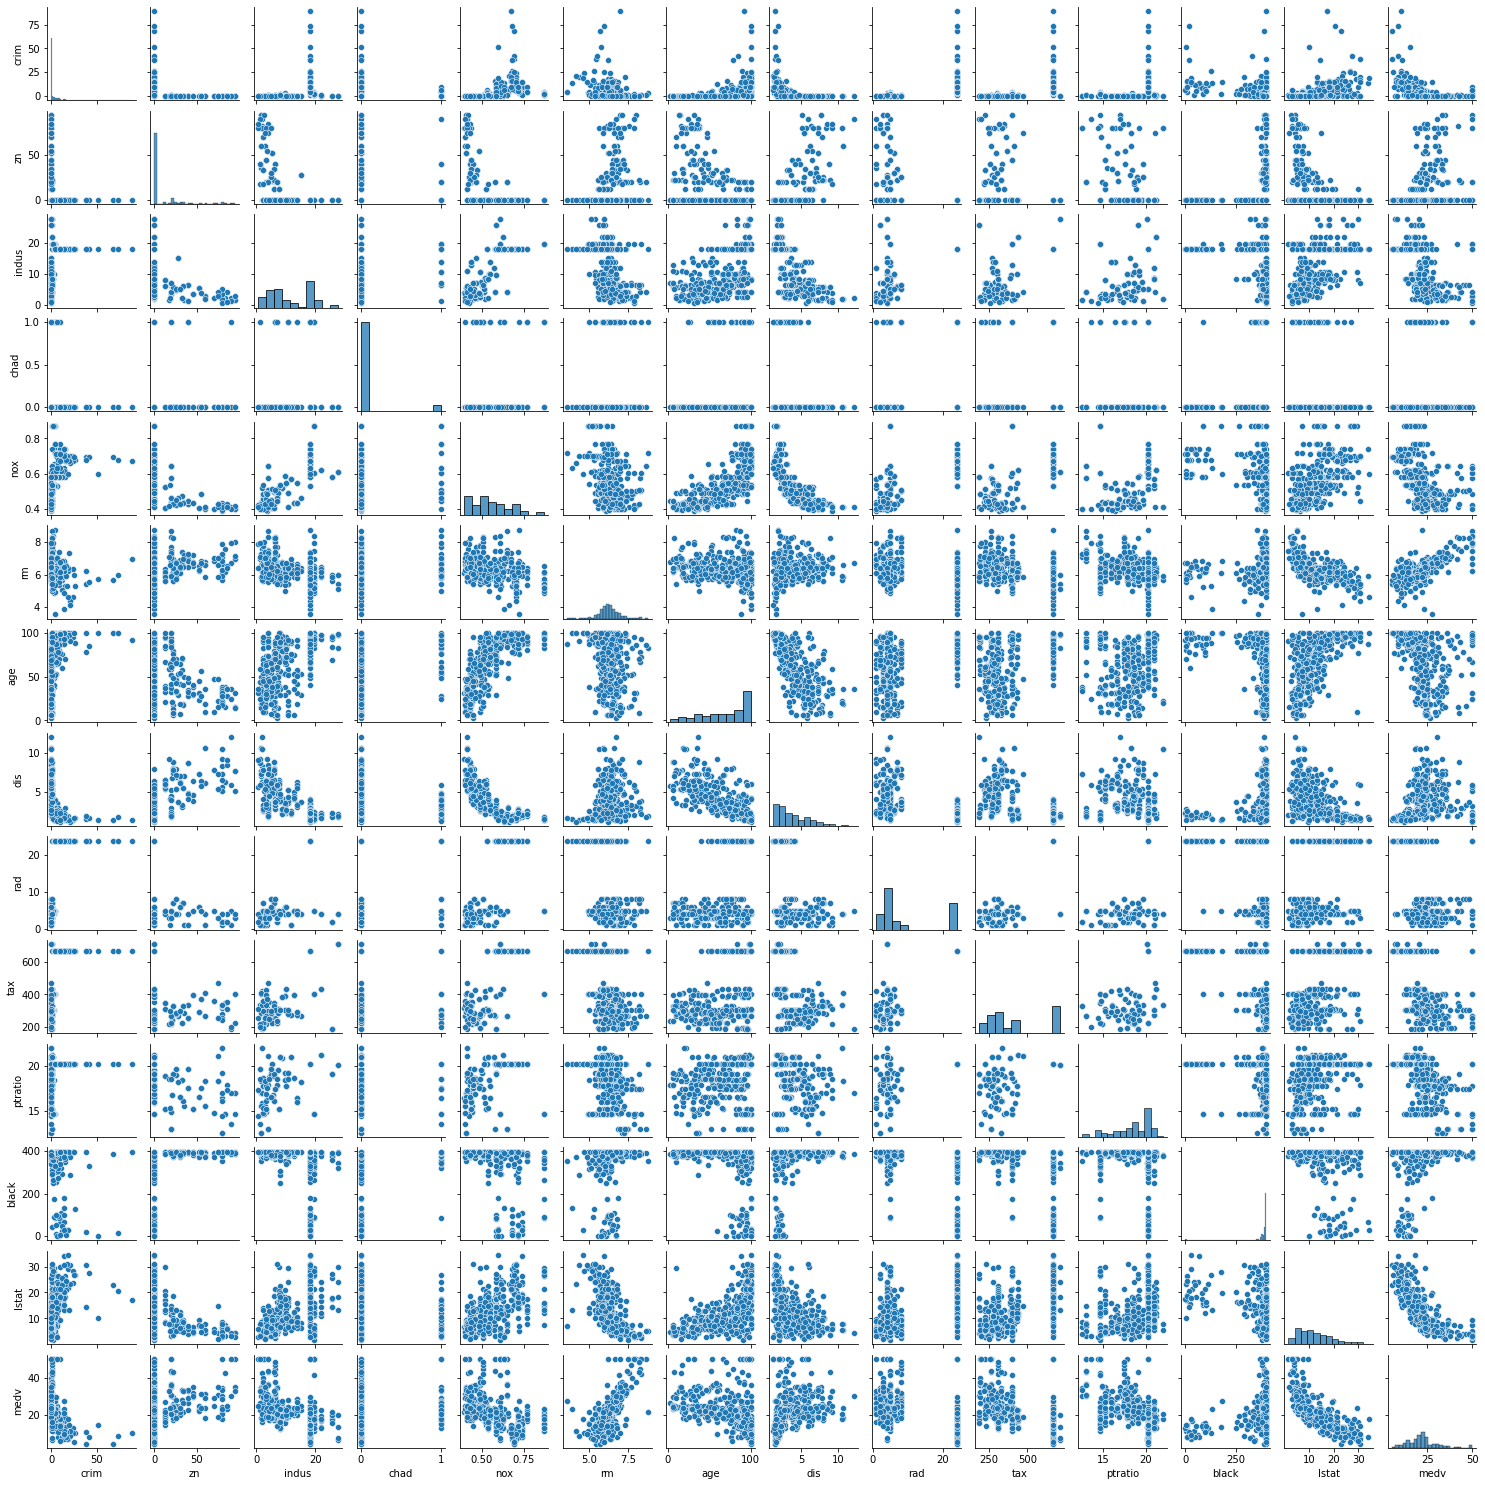

In [7]:
sns.pairplot(df,height=1.5)
plt.show()

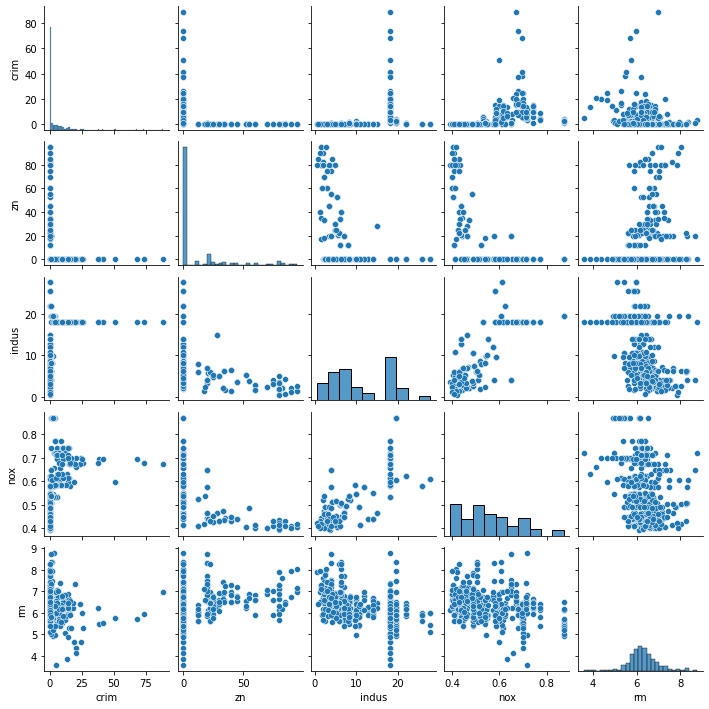

In [8]:
col_study1=['crim','zn','indus','nox','rm']
sns.pairplot(df[col_study1],height=2)
plt.show()


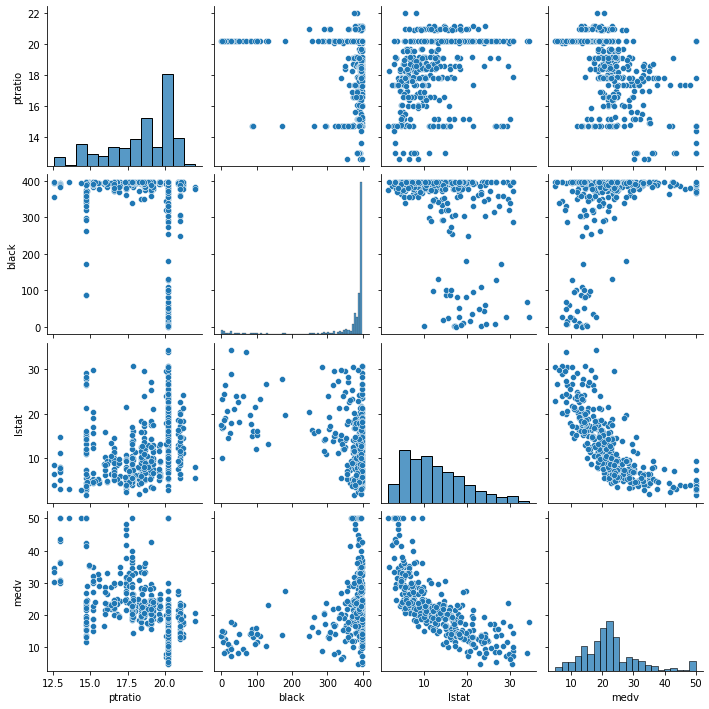

In [9]:
col_study=['ptratio','black','lstat','medv']
sns.pairplot(df[col_study])
plt.show()

## Correlation

In [10]:
df.corr()

,crim,zn,indus,chad,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chad,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


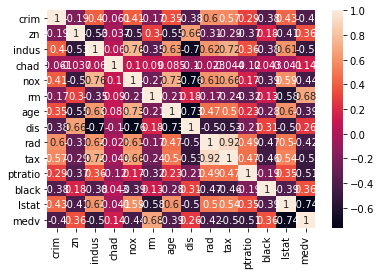

In [11]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

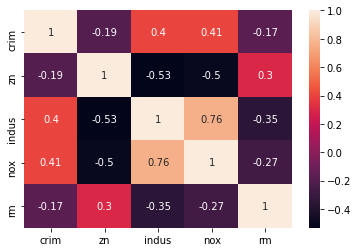

In [12]:
plt.figure()
col_study1=['crim','zn','indus','nox','rm']
sns.heatmap(df[col_study1].corr(),annot=True)
plt.show()

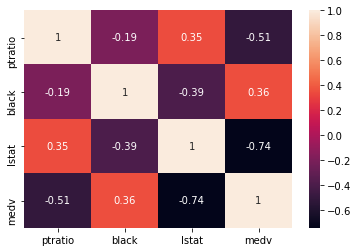

In [13]:
col_study=['ptratio','black','lstat','medv']
plt.figure()
sns.heatmap(df[col_study].corr(),annot=True)
plt.show()

In [14]:
pd.options.display.float_format='{:,.2f}'.format
df.corr()

,crim,zn,indus,chad,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.19,0.40,-0.06,0.41,-0.17,0.35,-0.38,0.60,0.57,0.29,-0.38,0.43,-0.40
zn,-0.19,1.00,-0.53,-0.04,-0.50,0.30,-0.55,0.66,-0.31,-0.29,-0.37,0.18,-0.41,0.36
indus,0.40,-0.53,1.00,0.06,0.76,-0.35,0.63,-0.70,0.62,0.72,0.36,-0.38,0.61,-0.50
chad,-0.06,-0.04,0.06,1.00,0.10,0.09,0.08,-0.10,-0.02,-0.04,-0.12,0.04,-0.04,0.14
nox,0.41,-0.50,0.76,0.10,1.00,-0.27,0.73,-0.76,0.61,0.66,0.17,-0.39,0.59,-0.44
rm,-0.17,0.30,-0.35,0.09,-0.27,1.00,-0.21,0.18,-0.17,-0.24,-0.32,0.13,-0.58,0.68
age,0.35,-0.55,0.63,0.08,0.73,-0.21,1.00,-0.73,0.47,0.50,0.23,-0.28,0.60,-0.39
dis,-0.38,0.66,-0.70,-0.10,-0.76,0.18,-0.73,1.00,-0.50,-0.53,-0.21,0.31,-0.50,0.26
rad,0.60,-0.31,0.62,-0.02,0.61,-0.17,0.47,-0.50,1.00,0.92,0.49,-0.47,0.50,-0.42
tax,0.57,-0.29,0.72,-0.04,0.66,-0.24,0.50,-0.53,0.92,1.00,0.47,-0.46,0.54,-0.50


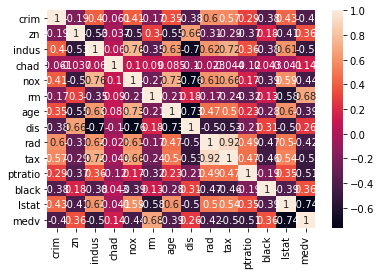

In [15]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

## Liniar Regression

In [16]:
df.head()

,crim,zn,indus,chad,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.16,0.00,10.81,0,0.41,5.96,17.50,5.29,4,305,19.20,376.94,9.88,21.70
1,0.10,25.00,5.13,0,0.45,5.93,47.20,6.93,8,284,19.70,396.90,9.22,19.60
2,0.35,0.00,9.90,0,0.54,5.97,76.70,3.10,4,304,18.40,396.24,9.97,20.30
3,2.73,0.00,19.58,0,0.87,5.60,94.90,1.53,5,403,14.70,351.85,21.45,15.40
4,0.04,21.00,5.64,0,0.44,6.12,63.00,6.81,4,243,16.80,393.97,9.43,20.50


In [17]:
X=df['rm'].values.reshape(-1,1)

In [18]:
y=df['medv'].values

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model.fit(X,y)

LinearRegression()

In [22]:
model.coef_

array([8.93784219])

In [23]:
model.intercept_

-34.00899383924782

C:\Users\ericsson\anaconda3\envs\python_lab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


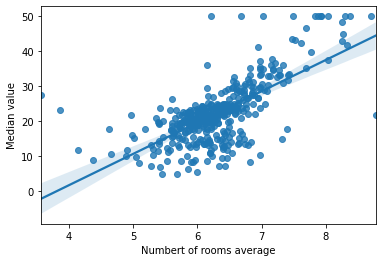

In [24]:
plt.figure();
sns.regplot(X,y);
plt.xlabel('Numbert of rooms average');
plt.ylabel('Median value');
plt.show();

The data is not exacly clear we see that some rooms are not on the median value=>there are a fews exceptions



We created the model that we can make prediction 


In [25]:
model.predict(np.array([5]).reshape(1,-1))

array([10.6802171])

C:\Users\ericsson\anaconda3\envs\python_lab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


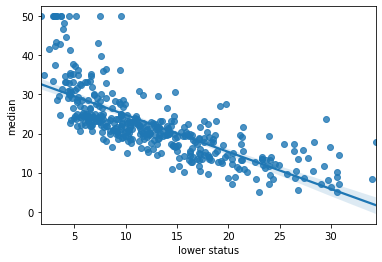

In [26]:
#Another exemple


#Step1:choosing the model
#Step2:
model1=LinearRegression()

#Step3
X1=df['lstat'].values.reshape(-1,1)
y1=df['medv'].values

#Step4:
model1.fit(X1,y1)

#Step5:plotting

plt.figure();
sns.regplot(X1,y1);
plt.xlabel('lower status');
plt.ylabel('median');
plt.show();

In [27]:
#Step 6=>actual prediction
model1.predict(np.array([15]).reshape(1,-1))

array([20.03680852])

## Robust Regression

In [28]:
df.head()
X=df['rm'].values.reshape(-1,1)
y=df['medv'].values

In [29]:
from sklearn.linear_model import RANSACRegressor 

In [30]:
mod=RANSACRegressor()

In [31]:
mod.fit(X,y)

RANSACRegressor()

In [32]:
inlier=mod.inlier_mask_
outlier=np.logical_not(inlier)

In [33]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [34]:
linex=np.arange(3,10,1)
liney=mod.predict(linex.reshape(-1,1))

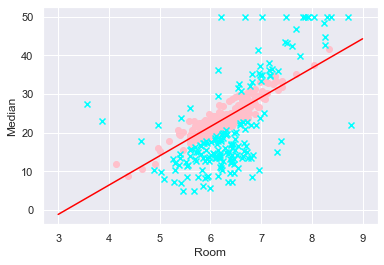

In [35]:
#Plotting

sns.set(style='darkgrid',context='notebook');
plt.figure();
plt.scatter(X[inlier],y[inlier],c='pink',marker='o',label='Inlier');
plt.scatter(X[outlier],y[outlier],c='cyan',marker='x',label='Outlier');
plt.plot(linex,liney,color='red')
plt.xlabel('Room');
plt.ylabel('Median');
plt.show();

In [36]:
df.head()
m2=RANSACRegressor()
X2=df['lstat'].values.reshape(-1,1)
y2=df['medv'].values
m2.fit(X2,y2)
inlier=m2.inlier_mask_
outlier=np.logical_not(inlier)
linex2=np.arange(0,37,1)
liney2=m2.predict(linex2.reshape(-1,1))



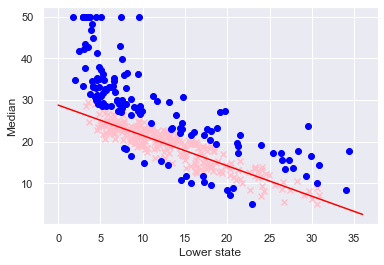

In [37]:
#Plotting
sns.set(style='darkgrid',context='notebook');
plt.figure();
plt.scatter(X2[inlier],y2[inlier],c='pink',marker='x');
plt.scatter(X2[outlier],y2[outlier],c='blue',marker='o');
plt.plot(linex2,liney2,color='red');
plt.xlabel('Lower state');
plt.ylabel('Median');
plt.show();

## Performance of regression

In [38]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df['medv'].values
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=0)#random it s from where to begin
lr=LinearRegression()
lr.fit(X_train,y_train)
y_tr_p=lr.predict(X_train)
y_test_p=lr.predict(X_test)


### Methode 1=>residual analysis

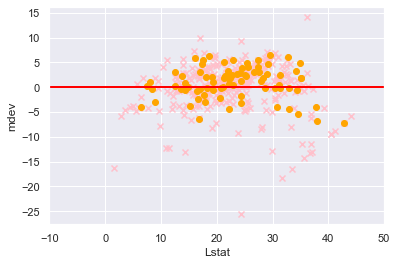

In [39]:
plt.figure()
plt.scatter(y_tr_p,y_tr_p-y_train,c='pink',marker='x')
plt.scatter(y_test_p,y_test_p-y_test,c='orange',marker='o')
plt.xlabel('Lstat')
plt.ylabel('mdev')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-10,50])
plt.show()



### Methode 2=>MSE

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mean_squared_error(y_test,y_test_p)

10.769143775943563

In [42]:
mean_squared_error(y_train,y_tr_p)

21.633397349996596

### Methode 3=>R^2

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_test_p)

0.8494770937644089

In [45]:
r2_score(y_train,y_tr_p)

0.7278504803412009

#### How does a perfect model look like

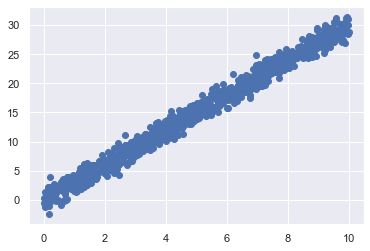

In [46]:
generate=np.random.RandomState(0)
X=10*generate.rand(1000)
y=3*X+np.random.randn(1000)
plt.figure()
plt.scatter(X,y)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression
md=LinearRegression(fit_intercept=True)
md.fit(X_train.reshape(-1,1),y_train)


y1=md.predict(X_train.reshape(-1,1))
y2=md.predict(X_test.reshape(-1,1))


Be careful the results from perfect prediction are much more dif


In [50]:
mean_squared_error(y_test,y2)


1.1464618396702113

In [51]:
mean_squared_error(y_train,y1)

1.046857857074663

In [52]:
r2_score(y_test,y2)

0.9854090781277037

In [53]:
r2_score(y_train,y1)

0.9861559142916932

## Multiple Regression

In [54]:
#import some package

In [55]:
from sklearn.datasets import load_boston

In [56]:
boston_data=load_boston()

In [57]:
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [59]:
df.shape

(506, 13)

In [60]:
X=df

In [61]:
y=boston_data.target

### Statsmodels

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

$u=mX$

$y=mX + c$

In [63]:
X_cons=sm.add_constant(X)

In [64]:
pd.DataFrame(X_cons)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,1.00,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,1.00,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,1.00,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,1.00,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.00,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67
502,1.00,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08
503,1.00,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64
504,1.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48


In [65]:
modell=sm.OLS(y,X_cons)

In [66]:
lr=modell.fit()

In [67]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        16:51:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Statistical outputs:


In [68]:
form_lr=smf.ols(formula='y~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'
                ,data=df)

In [69]:
mrl=form_lr.fit()

In [70]:
mrl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        16:51:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
ceva=smf.ols('y~CRIM+ZN+CHAS+NOX',data=df)
m=ceva.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.72
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.14e-37
Time:                        16:51:01   Log-Likelihood:                -1749.9
No. Observations:                 506   AIC:                             3510.
Df Residuals:                     501   BIC:                             3531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8818      2.157     15.245      0.000      28.644      37.119
CRIM          -0.2515      0.044     -5.676      0.000      -0.339      -0.164
ZN             0.0768      0.017      4.462      0.000       0.043       0.111
CHAS           6.9811      1.367      5.109      0.000       4.296       9.666
NOX          -19.4631      3.768     -5.166      0.000     -26.865     -12.061
==============================================================================
Omnibus:                      172.725   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.442
Skew:                           1.680   Prob(JB):                    4.71e-105
Kurtosis:                       6.390   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We make a small summary

We want to pay attention for cond which can be over 30

We create a correlation matrix

In [72]:
corr_matrix=df.corr()


corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


In [73]:
corr_matrix[np.abs(corr_matrix)<0.6]=0
corr_matrix
#We make this thing for eliminating the numbers that are smaller than 0.6 and bigger than -0.6

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00
ZN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,1.00,0.00,0.76,0.00,0.64,-0.71,0.00,0.72,0.00,0.00,0.60
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,0.00,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61
AGE,0.00,0.00,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.00,0.00,0.00,0.60
DIS,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,0.00,0.00,0.00,0.00
RAD,0.63,0.00,0.00,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00
TAX,0.00,0.00,0.72,0.00,0.67,0.00,0.00,0.00,0.91,1.00,0.00,0.00,0.00


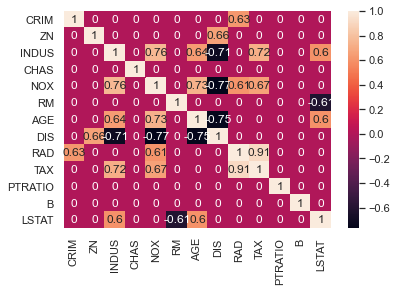

In [74]:
plt.figure()
sns.heatmap(corr_matrix,annot=True)
plt.show()

### Detecting correletion 

In [75]:
eigenvalues,eigenvectors=np.linalg.eig(df.corr())


In [76]:
pd.Series(eigenvalues).sort_values()

8    0.06
10   0.17
11   0.19
12   0.22
9    0.28
7    0.40
6    0.54
5    0.66
4    0.83
3    0.86
2    1.24
1    1.43
0    6.13
dtype: float64

In [77]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=True)

11   0.00
7    0.02
10   0.02
12   0.02
3    0.04
6    0.04
4    0.04
5    0.05
0    0.05
1    0.08
2    0.25
8    0.63
9    0.72
dtype: float64

#### Revisiting features 

In [78]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <BarContainer object of 10 artists>)

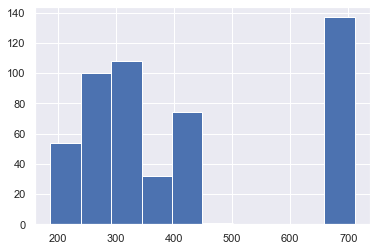

In [79]:
plt.hist(df['TAX'])

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <BarContainer object of 10 artists>)

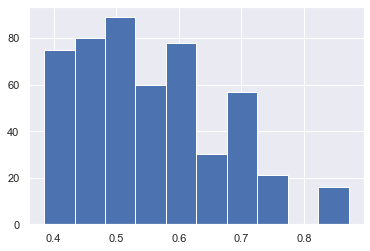

In [80]:
plt.hist(df['NOX'])

### Ridgr Regression

In [81]:
from sklearn.linear_model import Ridge

In [82]:
model=Ridge(alpha=0.5,normalize=True)

In [83]:
rgn=np.random.randn(100)*10
y_gen=0.5*rgn+2*np.random.randn(100)
index=rgn.argmax()
y_gen[index]=200
index=rgn.argmin()
y_gen[index]=-200
model.fit(rgn.reshape(-1,1),y_gen)

Ridge(alpha=0.5, normalize=True)

In [84]:
rid_pred=model.predict(rgn.reshape(-1,1))

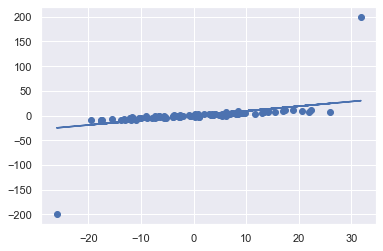

In [85]:
plt.figure()
plt.scatter(rgn,y_gen)
plt.plot(rgn,rid_pred)
plt.show()

### Lossa Regression

In [86]:
from sklearn.linear_model import Lasso 

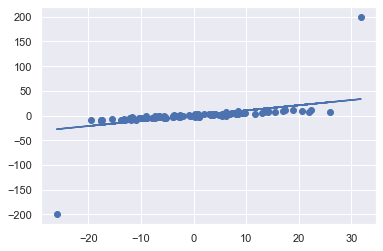

In [87]:
lossa=Lasso(alpha=0.4,normalize=True)
lossa.fit(rgn.reshape(-1,1),y_gen)
lossa_p=lossa.predict(rgn.reshape(-1,1))

plt.figure()
plt.scatter(rgn,y_gen)
plt.plot(rgn,lossa_p)
plt.show()

### Elastic Net Regression

In [88]:
from sklearn.linear_model import ElasticNet

In [89]:
el=ElasticNet(alpha=0.02,normalize=True)

In [90]:
el.fit(rgn.reshape(-1,1),y_gen)
el_p=el.predict(rgn.reshape(-1,1))

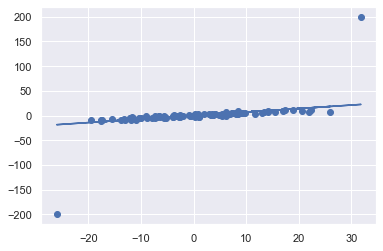

In [91]:
plt.figure()
plt.scatter(rgn,y_gen)
plt.plot(rgn,el_p)
plt.show()

### Polynomial Regression

In [92]:
np.random.seed(42)
n=100

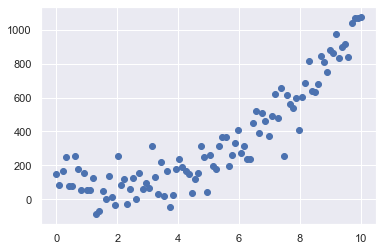

In [93]:
X=np.linspace(0,10,100)
rgn=np.random.randn(n)*100
y=X**3+100+rgn
plt.figure()
plt.scatter(X,y)
plt.show()

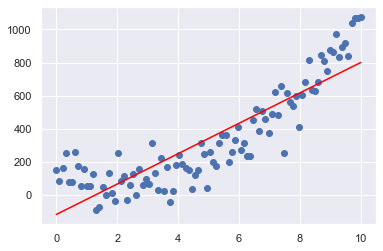

In [94]:
model=LinearRegression()
model.fit(X.reshape(-1,1),y)
model_pred=model.predict(X.reshape(-1,1))

plt.figure()
plt.scatter(X,y)
plt.plot(X,model_pred,color='red')
plt.show()

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
ply=PolynomialFeatures(degree=2)

In [97]:
X_poly=ply.fit_transform(X.reshape(-1,1))

In [98]:
lin2=LinearRegression()
lin2.fit(X_poly,y.reshape(-1,1))
y_pred=lin2.predict(X_poly)

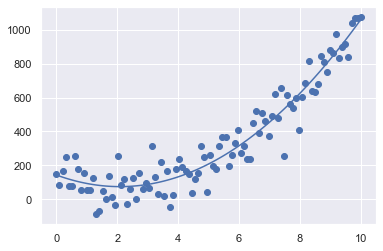

In [99]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

## Nonlinear Relationships

In [100]:
import sys


In [101]:
from sklearn.datasets import load_boston

In [103]:
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [105]:
y=boston_data.target

In [106]:
df=pd.read_csv('housing.data',delim_whitespace=True,header=None)

In [108]:
df.columns=['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
model=DecisionTreeRegressor(max_depth=5)

In [118]:
X=df['LSTAT'].values.reshape(-1,1)

In [119]:
model.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [120]:
sort=X.flatten().argsort()

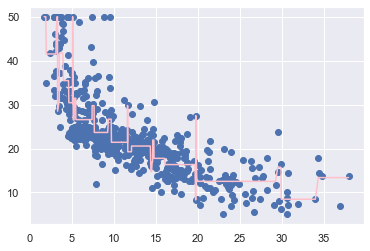

In [121]:
plt.figure()
plt.scatter(X[sort],y[sort])
plt.plot(X[sort],model.predict(X[sort]),color='pink')
plt.show()

### Random Forest

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [127]:
X=df.values



In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
model=RandomForestRegressor()

In [132]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [134]:
y_tr_p=model.predict(X_train)
y_t_p=model.predict(X_test)

### AdaBoost

In [135]:
from sklearn.ensemble import AdaBoostRegressor

In [136]:
m=AdaBoostRegressor()

In [137]:
m.fit(X_train,y_train)

AdaBoostRegressor()

In [139]:
y_tr_p=m.predict(X_train)
y_t_p=m.predict(X_test)

### Without Pre-processing

<ipython-input-166-365426dd95aa>:15: RuntimeWarning: overflow encountered in square
  cost1=(err**2).sum()/2.0
<ipython-input-166-365426dd95aa>:13: RuntimeWarning: invalid value encountered in add
  w[1:] += alpha*X.T.dot(err)


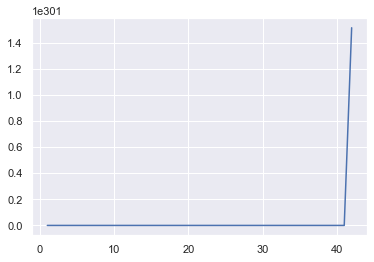

In [166]:
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()
X=df['LSTAT'].values
y=boston_data.target
alpha=0.0001
w=np.zeros(1+ X.shape[0])
cost=[]
n=100
for i in range(n):
    y_pred=np.dot(X,w[1:])+w[0]
    err=y-y_pred
    w[1:] += alpha*X.T.dot(err)
    w[0] += alpha*err.sum()
    cost1=(err**2).sum()/2.0
    cost.append(cost1)
plt.figure()
plt.plot(range(1,n+1),cost);
plt.show()
   